## What are the most demanded skills for the Top 3 most popular data Roles?

### Methodology

    1. Clean-Up skill column
    2. Calculate skill count based on "job_title_short"
    3. Calculate skill percentage
    4. Plot final findings

In [1]:
#importing Data Analysis Libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
import seaborn as sns

#loading the dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [9]:
# filtering to only include data roles in the UK

df_UK = df[df['job_country'] == 'United Kingdom']

# Breaking down the skills to individual rows
df_skills = df_UK.explode('job_skills')

#Grouping by job title and skill to get counts
df_skill_counts = df_skills.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count')


df_skill_counts.sort_values(by='skill_count', ascending=False, inplace=True)
df_skill_counts

,job_title_short,job_skills,skill_count
532,Data Engineer,sql,7050
502,Data Engineer,python,6462
687,Data Scientist,python,6329
390,Data Engineer,azure,4865
345,Data Analyst,sql,4467
...,...,...,...
757,Machine Learning Engineer,aurora,1
751,Data Scientist,wsl,1
1,Business Analyst,airtable,1
693,Data Scientist,react.js,1


In [13]:
job_titles = df_skill_counts['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])  # Top 3 job titles

job_titles


['Data Analyst', 'Data Engineer', 'Data Scientist']

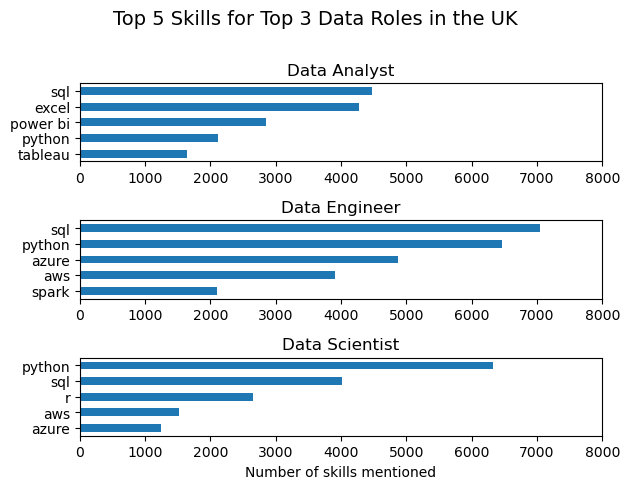

In [ ]:
#plotting the top 5 skills for the top 3 job titles

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skill_counts[df_skill_counts['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y= 'skill_count', ax=ax[i], legend=False, title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 8000)
    ax[2].set_xlabel('Number of skills mentioned')


fig.suptitle('Top 5 Skills for Top 3 Data Roles in the UK', y=1.01, fontsize=14)
fig = plt.tight_layout()
plt.show()

In [48]:
# Getting total number of job postings for each job title in the UK
df_job_title_count = df_UK['job_title_short'].value_counts().reset_index(name='jobs_total')

# Merging total job counts with skill counts to get percentage
df_skills_perc = pd.merge(df_skill_counts, df_job_title_count, how='left', on='job_title_short')
df_skills_perc['skill_percentage'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100
df_skills_perc.sort_values(by=['job_title_short', 'skill_percentage'], ascending=[True, False], inplace=True)
df_skills_perc

,job_title_short,job_skills,skill_count,jobs_total,skill_percentage
87,Business Analyst,sql,384,827,46.432890
110,Business Analyst,excel,289,827,34.945586
125,Business Analyst,power bi,255,827,30.834341
177,Business Analyst,python,152,827,18.379686
214,Business Analyst,tableau,119,827,14.389359
...,...,...,...,...,...
1245,Software Engineer,openstack,1,541,0.184843
1246,Software Engineer,terminal,1,541,0.184843
1247,Software Engineer,vue.js,1,541,0.184843
1248,Software Engineer,redhat,1,541,0.184843


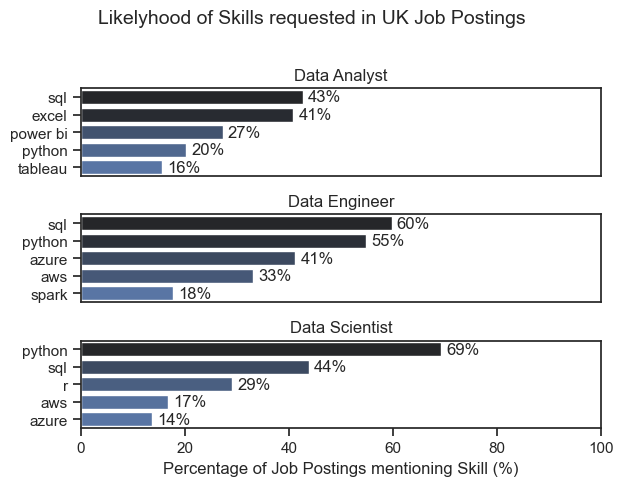

In [84]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    # df_plot.plot(kind='barh', x='job_skills', y= 'skill_percentage', ax=ax[i], legend=False, title=job_title)
    sns.barplot(data=df_plot, x='skill_percentage', y='job_skills', ax=ax[i], hue= 'skill_count', palette = 'dark:b_r')
    ax[i].set_title(job_title)
    # ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 100)
    ax[i].set_xlabel('')
    if i == 2:
        ax[i].set_xlabel('Percentage of Job Postings mentioning Skill (%)')
        
    for n, v in enumerate(df_plot['skill_percentage']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
    
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])


fig.suptitle('Likelyhood of Skills requested in UK Job Postings', y=1.01, fontsize=14)
fig = plt.tight_layout()
plt.show()